<a id='top'></a>  
# ECAL timing studies
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

#### Summary
 * [Preliminary: some 2016 events](#preliminary2016) <a href='#preliminary2016'></a> 
      * [Z->ee pair](#ZeePair) <a href='#ZeePair'></a> 
      * [Electron: amplitude and time](#etimeamp) <a href='#etimeamp'></a> 
      
<span style="color:blue"> **Click to hide/show codes:** </span> <a href="javascript:code_toggle()">[Toggle Code]</a> 

In [11]:
import pandas as pd
import numpy as np
import uproot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
font = {'size'   : 16}
mpl.rc('font', **font)

/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Preliminary tests: some 2016 events <a id='preliminary2016'></a> 

File:
```
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/ecalelf/ntuples/13TeV/ALCARERECO/103X_dataRun2_v6_ULBaseForICs_FinalEtaSv2_newRegV1/DoubleEG-ZSkim-Run2016B-07Aug17_ver2/273150-275376/271036-284044_PromptReco/pedNoise/DoubleEG-ZSkim-Run2016B-07Aug17_ver2-273150-275376.root
```

In [4]:
file_name = "/eos/cms/store/group/dpg_ecal/alca_ecalcalib/ecalelf/ntuples/13TeV/ALCARERECO/103X_dataRun2_v6_ULBaseForICs_FinalEtaSv2_newRegV1/DoubleEG-ZSkim-Run2016B-07Aug17_ver2/273150-275376/271036-284044_PromptReco/pedNoise/DoubleEG-ZSkim-Run2016B-07Aug17_ver2-273150-275376.root"
#file_name = "/eos/cms/store/group/dpg_ecal/alca_ecalcalib/ecalelf/ntuples/13TeV/ALCARERECO/PromptReco2017_103X_EtaScaleupdatedSCregressionV3/DoubleEG-Run2017B-ZSkim-Prompt-v1/297046-297723/294927-306462_Prompt_v1/pedNoise/DoubleEG-Run2017B-ZSkim-Prompt-v1-297046-297723.root"
file_content = uproot.open(file_name)
#file_content.allkeys()
cache = {}

Content:

In [5]:
selected = file_content["selected"]
print selected.keys()

['runNumber', 'lumiBlock', 'eventNumber', 'eventTime', 'nBX', 'isTrain', 'mcGenWeight', 'HLTfire', 'rho', 'nPV', 'nPU', 'vtxX', 'vtxY', 'vtxZ', 'eleID', 'chargeEle', 'recoFlagsEle', 'etaEle', 'phiEle', 'fbremEle', 'R9Ele', 'gsfTrackLengthFromVtxP', 'gsfTrackLengthFromTangents', 'etaSCEle', 'phiSCEle', 'nHitsSCEle', 'avgLCSC', 'rawEnergySCEle', 'mustEnergySCEle', 'energy_ECAL_ele', 'energy_ECAL_pho', 'energyUncertainty_ECAL_ele', 'energyUncertainty_ECAL_pho', 'energy_5x5SC', 'pModeGsfEle', 'pAtVtxGsfEle', 'pNormalizedChi2Ele', 'trackMomentumErrorEle', 'xSeedSC', 'ySeedSC', 'eeRingNoSeedSC', 'gainSeedSC', 'energySeedSC', 'energySecondToSeedSC', 'amplitudeSeedSC', 'amplitudeSecondToSeedSC', 'timeSeedSC', 'timeSecondToSeedSC', 'icSeedSC', 'laserSeedSC', 'alphaSeedSC', 'pedestalSeedSC', 'noiseSeedSC', 'esEnergySCEle', 'esEnergyPlane2SCEle', 'esEnergyPlane1SCEle', 'rawESEnergyPlane2SCEle', 'rawESEnergyPlane1SCEle', 'etaMCEle', 'phiMCEle', 'energyMCEle', 'invMass_MC', 'ZEvent', 'invMass', 'in

In [6]:
branches = ['runNumber','etaSCEle','phiSCEle',
            'xSeedSC','ySeedSC',
            'nPV',
            'timeSeedSC','timeSecondToSeedSC','amplitudeSeedSC', 'amplitudeSecondToSeedSC']
df_selected = selected.pandas.df(branches, cache = cache, flatten = False)

In [24]:
#df_selected.head(30)
df_selected['time_diff_ee'] = df_selected['timeSeedSC[0]']-df_selected['timeSeedSC[1]']
df_selected['time_diff_ee_abs'] = abs(df_selected['timeSeedSC[0]']-df_selected['timeSeedSC[1]'])

df_selected['time_diff_e1_seeds'] = df_selected['timeSeedSC[0]']-df_selected['timeSecondToSeedSC[0]']
df_selected['amplitude_diff_e1_seeds'] = df_selected['amplitudeSeedSC[0]']-df_selected['amplitudeSecondToSeedSC[0]']

### Z -> ee Pair <a id='ZeePair'></a> 

$t_{e1}$ = first electron seed time

$t_{e2}$ = second electron seed time

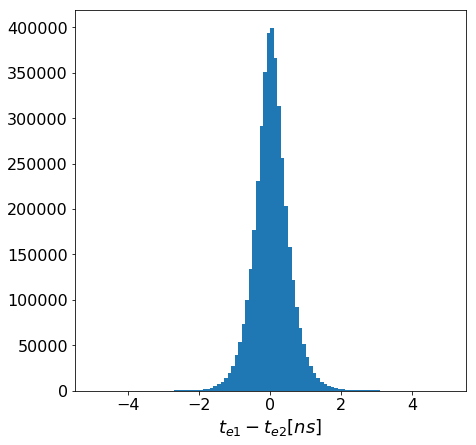

In [216]:
df_selected_ee = df_selected[abs((df_selected['time_diff_ee']))<5];
fig, ax = plt.subplots(figsize=(7,7))
plot = ax.hist(df_selected_ee['time_diff_ee'], 100)
ax.set_xlabel('$t_{e1} - t_{e2} [ns]$',fontsize=18);

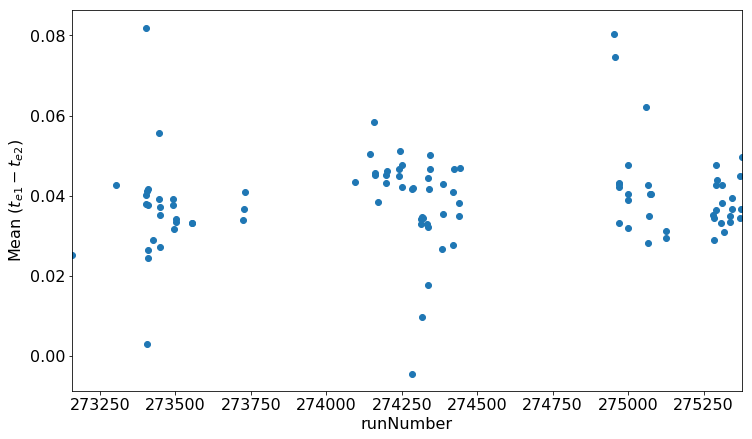

In [199]:
ax = df_selected_ee.groupby("runNumber")["time_diff_ee"].agg(["mean"]).plot(legend = False, style='o',figsize=(12,7));
ax.set_ylabel("Mean $(t_{e1} - t_{e2})$");

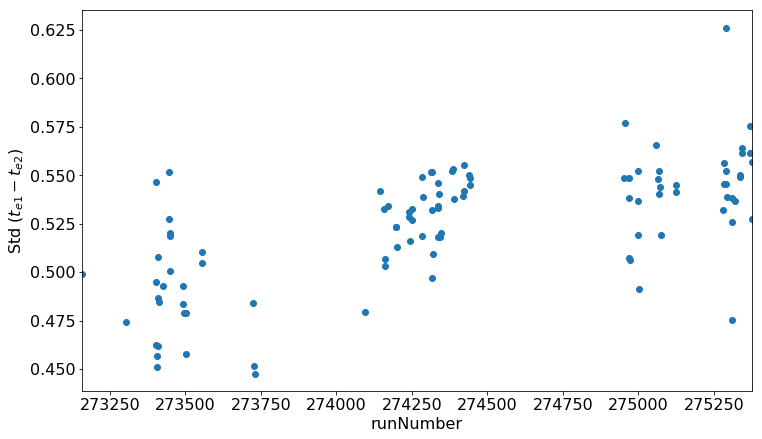

In [218]:
ax = df_selected_ee.groupby("runNumber")["time_diff_ee"].agg(["std"]).plot(legend=False, style ='o',figsize=(12,7));
ax.set_ylabel("Std $(t_{e1} - t_{e2})$");

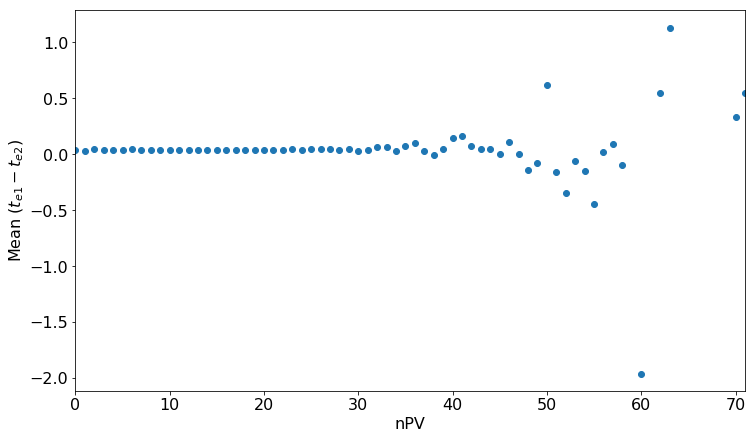

In [219]:
ax = df_selected_ee.groupby("nPV")["time_diff_ee"].agg(["mean"]).plot(legend=False, style ='o',figsize=(12,7));
ax.set_ylabel("Mean $(t_{e1} - t_{e2})$");

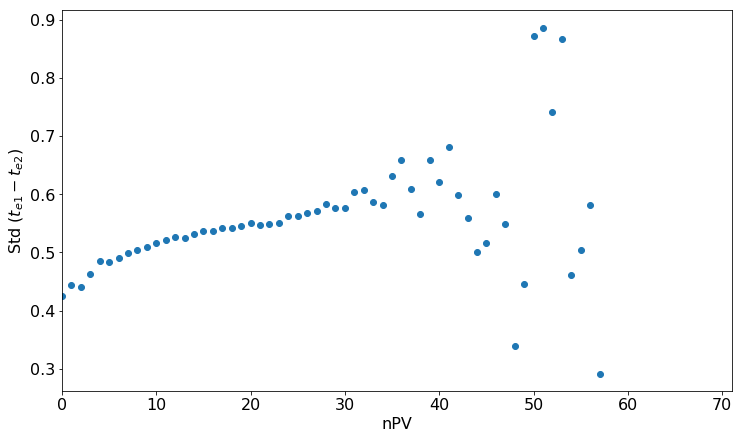

In [217]:
ax = df_selected_ee.groupby("nPV")["time_diff_ee"].agg(["std"]).plot(legend=False, style ='o',figsize=(12,7));
ax.set_ylabel("Std $(t_{e1} - t_{e2})$");

[Back to top](#top) <a href='#top'></a>

### Electron: amplitude and time <a id='etimeamp'></a> 

t$_{first}$ = seed time

t$_{second}$ = second to seed time

(one electron only)

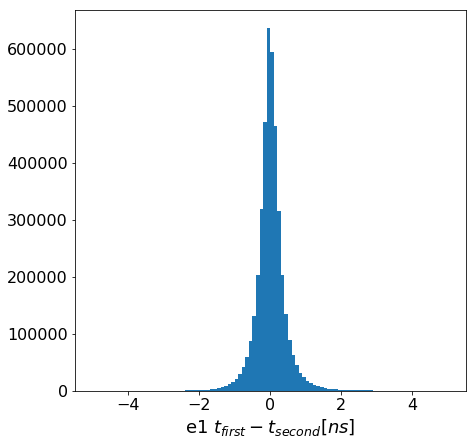

In [201]:
df_selected_e1 = df_selected[abs((df_selected['time_diff_e1_seeds']))<5];
fig, ax = plt.subplots(figsize=(7,7))
plot = ax.hist(df_selected_e1['time_diff_e1_seeds'], 100)
ax.set_xlabel('e1 $t_{first} - t_{second} [ns]$',fontsize=18);

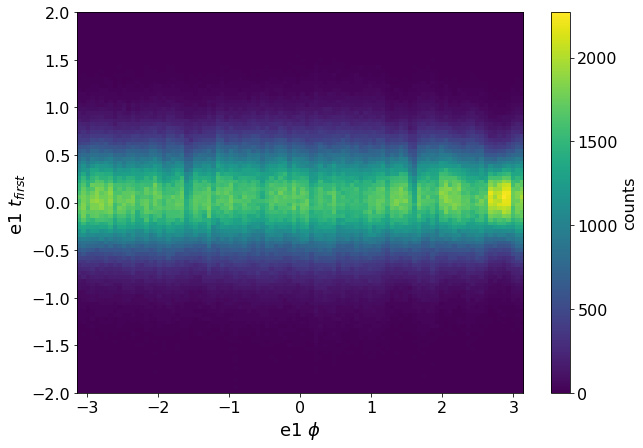

In [202]:
fig, ax = plt.subplots(figsize=(10,7))
plot = ax.hist2d(df_selected['phiSCEle[0]'],df_selected['timeSeedSC[0]'], cmap='viridis', range= [[-3.14, 3.14], [-2, 2]], bins=[100,100])
ax.set_xlabel('e1 $\phi$',fontsize=18);
ax.set_ylabel('e1 $t_{first}$',fontsize=18);
cb = fig.colorbar(plot[3])
cb.set_label('counts')

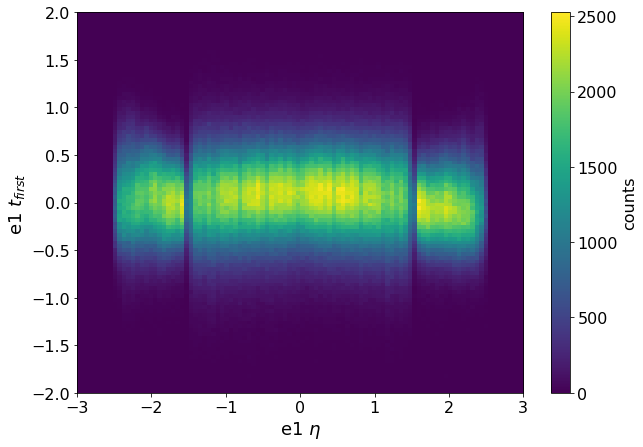

In [203]:
fig, ax = plt.subplots(figsize=(10,7))
plot = ax.hist2d(df_selected['etaSCEle[0]'],df_selected['timeSeedSC[0]'], cmap='viridis', range= [[-3, 3], [-2, 2]], bins=[100,100])
ax.set_xlabel('e1 $\eta$',fontsize=18);
ax.set_ylabel('e1 $t_{first}$',fontsize=18);
cb = fig.colorbar(plot[3])
cb.set_label('counts')

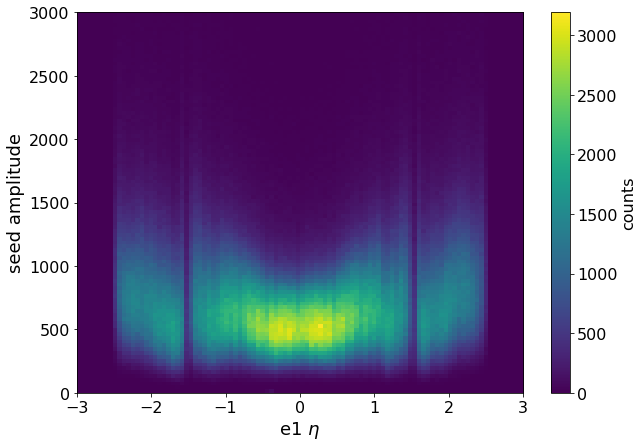

In [204]:
fig, ax = plt.subplots(figsize=(10,7))
plot = ax.hist2d(df_selected['etaSCEle[0]'],df_selected['amplitudeSeedSC[0]'], cmap='viridis', range= [[-3, 3], [0, 3000]], bins=[100,100])
ax.set_xlabel('e1 $\eta$',fontsize=18);
ax.set_ylabel('seed amplitude',fontsize=18);
cb = fig.colorbar(plot[3])
cb.set_label('counts')

In [28]:
#fig, ax = plt.subplots(figsize=(12,5))
df_selectedEB = df_selected[(abs(df_selected['etaSCEle[0]'])<1.5)  & (df_selected['time_diff_ee_abs'])<0.5 ]

#piv = pd.pivot_table(df_selectedEB, values='time_diff_ee_abs',index=['xSeedSC[0]'], columns=["ySeedSC[0]"], fill_value=0)
#ax = sns.heatmap(piv, square=True,cmap='viridis')
#plt.imshow((df_selectedEB['xSeedSC[0]'], df_selectedEB['ySeedSC[0]'],df_selectedEB['time_diff_ee']), aspect = 'auto')

#plot = ax.hist2d(df_selectedEB['xSeedSC[0]'],df_selectedEB['ySeedSC[0]'], weights= , cmap='viridis', range= [[-80, 80],[0,350]], bins=[100,100])
#plot = ax.hist2d(df_selectedEB['xSeedSC[0]'],df_selectedEB['ySeedSC[0]'], cmap='viridis', range= [[-80, 80],[0,350]], bins=[100,100])
#
#ax.set_xlabel('$i\eta$',fontsize=18);
#ax.set_ylabel('$i\phi$',fontsize=18);
#cb = fig.colorbar(plot[3])
#cb.set_label('counts')

In [29]:
#fig, ax = plt.subplots(figsize=(10,7))
df_selectedEE = df_selected[(abs(df_selected['etaSCEle[0]'])>1.5) & (abs(df_selected['time_diff_ee'])<5) ]

#plot = ax.hist2d(df_selectedEE['xSeedSC[0]'],df_selectedEE['ySeedSC[0]'],weights= , cmap='viridis', range= [[0, 100],[0,100]], bins=[100,100])
#ax.set_xlabel('$i\eta$',fontsize=18);
#ax.set_ylabel('$i\phi$',fontsize=18);
#cb = fig.colorbar(plot[3])
#cb.set_label('counts')

[Back to top](#top) <a href='#top'></a>